In [1]:
import pandas as pd
import numpy as np

import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression





from scipy.special import expit
from scipy.special import logit

plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [78]:
def replace_cols(dataframe, cols_to_replace, obj_to_replace, replacement):
    dataframe[cols_to_replace] = dataframe[cols_to_replace].replace(obj_to_replace, replacement)
    return dataframe

In [79]:
df = pd.read_csv('output.csv', header=0, sep=',', index_col=0)
cols_to_replace = ['Fatalities', 'Injured']
# df[cols_to_replace] = df[cols_to_replace].replace('Unknown', '0')
df = replace_cols(df, cols_to_replace, 'Unknown', '0' )
df[cols_to_replace] = df[cols_to_replace].astype(str).astype(int)
cols_to_replace =['Perpetrator', 'Target']
df = replace_cols(df, cols_to_replace, 'Unknown', np.nan)
df.head()

,Date,Country,City,Perpetrator,Fatalities,Injured,Target
0,2019-12-31,China,Hong Kong,NaN,0,0,Government (General)
1,2019-12-31,India,Bagiot Dora,NaN,0,1,Private Citizens & Property
2,2019-12-31,Sudan,El Geneina,NaN,2,0,"Government (General),Police"
3,2019-12-31,Sudan,El Geneina,NaN,2,1,Police
4,2019-12-31,Iraq,Baghdad,NaN,0,0,Private Citizens & Property


In [80]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
df['Date'].head(5)

0   2019-12-31
1   2019-12-31
2   2019-12-31
3   2019-12-31
4   2019-12-31
Name: Date, dtype: datetime64[ns]

In [4]:
df_country_event_count = df['Country'].value_counts()
df_country_event_count.head(20)


Iraq                                9171
Afghanistan                         7386
India                               3906
Yemen                               2999
Pakistan                            2900
Philippines                         2711
Nigeria                             2384
Somalia                             2289
Syria                               1439
Turkey                              1249
Libya                               1052
Thailand                             943
Egypt                                864
Democratic Republic of the Congo     804
Colombia                             703
West Bank and Gaza Strip             641
Nepal                                634
Cameroon                             599
Mali                                 580
United Kingdom                       460
Name: Country, dtype: int64

<AxesSubplot:>

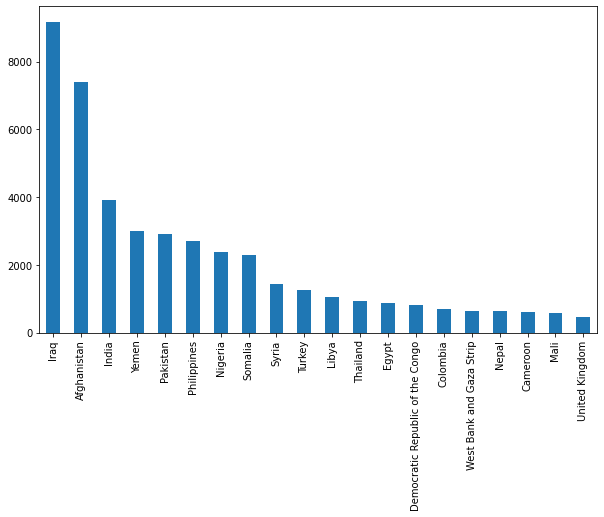

In [5]:
# df_country_event_count.plot()
df['Country'].value_counts().head(20).plot(kind='bar', y='Country')

In [6]:
df_country_Injured = df.groupby(['Country'])['Injured'].sum().reset_index(name ='Total_Injured')
df_country_Injured = df_country_Injured.sort_values(by =['Total_Injured'], ascending=False)


df_country_Injured.head(20)

,Country,Total_Injured
0,Afghanistan,31477
55,Iraq,28467
119,Syria,8417
96,Pakistan,6648
137,Yemen,6306
94,Nigeria,5154
110,Somalia,4735
126,Turkey,4403
52,India,2866
100,Philippines,2758


Text(0.5, 1.0, 'Injured per country')

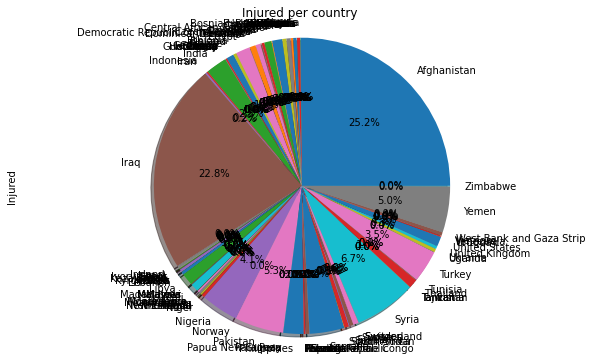

In [7]:
# df_country_Injured.Total_Injured.plot(kind='pie', y='Country')
df.groupby(['Country'])['Injured'].sum().plot(kind='pie', y='Country', shadow = True, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Injured per country")

Text(0.5, 1.0, 'Fatalities per country')

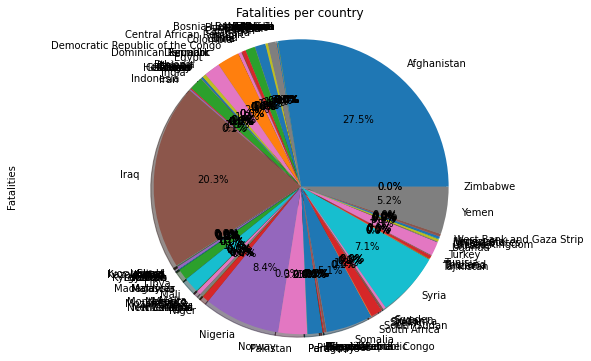

In [8]:
df.groupby(['Country'])['Fatalities'].sum().plot(kind='pie', y='Country', shadow = True, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Fatalities per country")

In [9]:
df_country_fatality = df.groupby(['Country'])['Fatalities'].sum().reset_index(name ='Total Fatalities')
df_country_fatality = df_country_fatality.sort_values(by =['Total Fatalities'], ascending=False)
df_country_fatality.head(20)

,Country,Total Fatalities
0,Afghanistan,33347
55,Iraq,24639
94,Nigeria,10123
119,Syria,8569
137,Yemen,6293
110,Somalia,6177
96,Pakistan,3822
31,Democratic Republic of the Congo,2953
36,Egypt,2133
79,Mali,2054


In [88]:
country_fatality_sum = df.groupby('Country')['Fatalities'].sum().reset_index().sort_values(by='Fatalities', ascending=False)
# country_fatality_sum = country_fatality_sum.sort_values(by='Fatalities',ascending=False)
country_fatality_sum.head(10)
# city_fataluty_sum = df.groupby('Country')['Injured'].sum()

,Country,Fatalities
0,Afghanistan,33347
55,Iraq,24639
94,Nigeria,10123
119,Syria,8569
137,Yemen,6293
110,Somalia,6177
96,Pakistan,3822
31,Democratic Republic of the Congo,2953
36,Egypt,2133
79,Mali,2054


<AxesSubplot:xlabel='Date'>

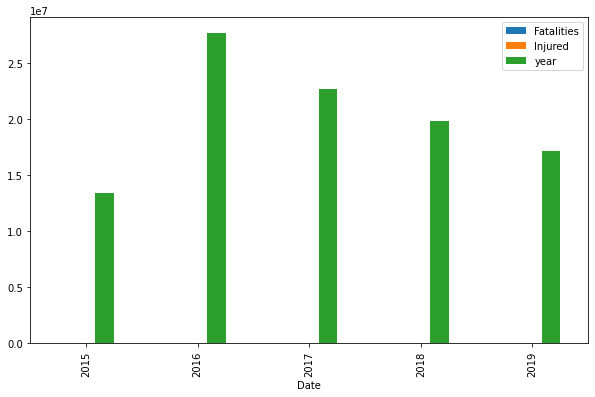

In [87]:
# df_record_per_year = df.groupby(df.Date.dt.to_period("Y"))['Date'].sum()
df.groupby(df.Date.dt.year).sum().plot(kind='bar')


<AxesSubplot:ylabel='Perpetrator'>

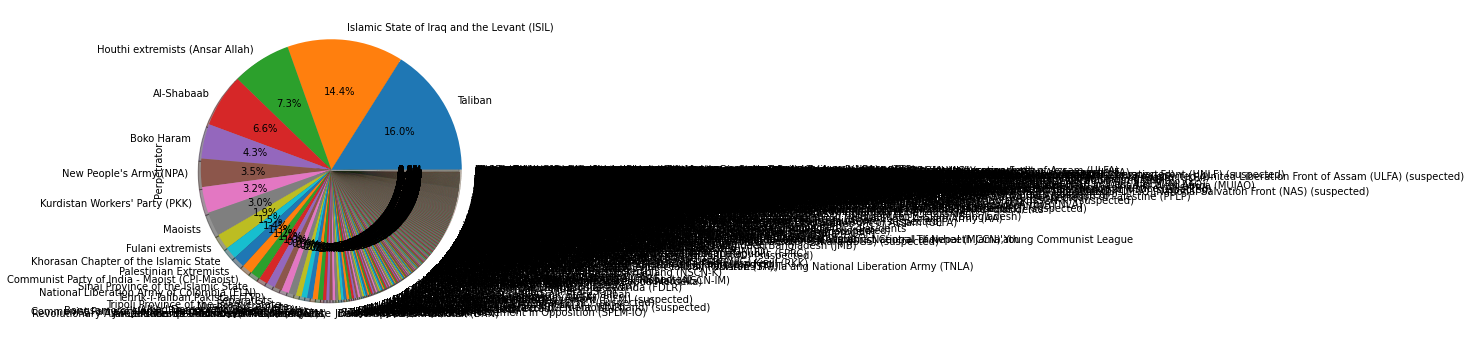

In [82]:
df['Perpetrator'].value_counts().plot(kind='pie', y='Perpetrator', shadow = True, autopct='%1.1f%%')

In [83]:
perpetrator_count = len(df['Perpetrator'].unique())
print(perpetrator_count)

1415


<AxesSubplot:ylabel='Target'>

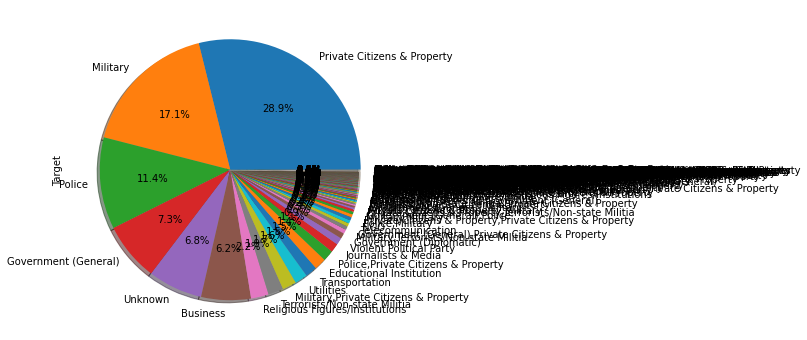

In [15]:
df['Target'].value_counts().plot(kind='pie', y='Target', shadow = True, autopct='%1.1f%%')

In [16]:
df['Target'].unique()

array(['Government (General)', 'Private Citizens & Property',
       'Government (General),Police', 'Police', 'Military', 'Business',
       'Telecommunication', 'Educational Institution',
       'Military,Military,Private Citizens & Property',
       'Private Citizens & Property,Private Citizens & Property',
       'Police,Terrorists/Non-state Militia', 'Unknown',
       'Violent Political Party',
       'Religious Figures/Institutions,Educational Institution,Business',
       'Military,Terrorists/Non-state Militia,Private Citizens & Property',
       'Terrorists/Non-state Militia', 'Religious Figures/Institutions',
       'Government (Diplomatic)',
       'Private Citizens & Property,Police,Private Citizens & Property',
       'Police,Private Citizens & Property',
       'Military,Government (General)', 'NGO', 'Military,Military',
       'Police,Military', 'Business,Police',
       'Government (General),Government (General)',
       'Private Citizens & Property,Educational Institutio

In [84]:
print(len(df['Country'].unique()))


140


In [18]:
df_country = pd.DataFrame({'Country': ['China', 'India', 'Sudan', 'Iraq', 'Cameroon', 'Myanmar',
       'Philippines', 'Russia', 'Syria', 'Yemen', 'Afghanistan',
       'Burkina Faso', 'Nepal', 'Democratic Republic of the Congo',
       'Bangladesh', 'Niger', 'Nigeria', 'Mali', 'Kenya', 'United States',
       'Pakistan', 'Somalia', 'Egypt', 'Saudi Arabia', 'Mozambique',
       'Israel', 'Libya', 'Brazil', 'Greece', 'Colombia', 'Ethiopia',
       'Indonesia', 'Chad', 'United Kingdom', 'West Bank and Gaza Strip',
       'Central African Republic', 'Taiwan', 'Turkey', 'Spain',
       'South Sudan', 'Ukraine', 'Mexico', 'Guyana', 'Thailand',
       'Trinidad and Tobago', 'Sri Lanka', 'Lebanon', 'Netherlands',
       'Burundi', 'Tanzania', 'Belgium', 'Chile', 'Rwanda', 'Jordan',
       'Tajikistan', 'Sweden', 'Venezuela', 'Canada', 'Ireland', 'France',
       'Senegal', 'South Africa', 'Hungary', 'Malawi', 'Bolivia',
       'Angola', 'Tunisia', 'Germany', 'Haiti', 'Lithuania', 'Finland',
       'Honduras', 'Ivory Coast', 'Malaysia', 'Nicaragua', 'Italy',
       'Uganda', 'Kazakhstan', 'Zimbabwe', 'Norway', 'Denmark',
       'Costa Rica', 'Iran', 'Japan', 'Peru', 'South Korea', 'Australia',
       'Ecuador', 'Argentina', 'New Caledonia', 'Benin', 'Switzerland',
       'Ghana', 'Albania', 'New Zealand', 'Maldives', 'Comoros',
       'Liberia', 'Gabon', 'Paraguay', 'Morocco', 'Serbia', 'Armenia',
       'Kosovo', 'Guinea', 'Bosnia-Herzegovina', 'Algeria', 'Guatemala',
       'Mauritania', 'Poland', 'Western Sahara', 'Cambodia', 'Azerbaijan',
       'Vietnam', 'Bulgaria', 'Montenegro', 'Bahrain', 'Austria',
       'Slovak Republic', 'Georgia', 'Kyrgyzstan', 'Latvia', 'Jamaica',
       'Malta', 'Sierra Leone', 'Czech Republic', 'Papua New Guinea',
       'Zambia', 'Djibouti', 'Laos', 'Macedonia', 'Dominican Republic',
       'Cyprus', 'Republic of the Congo', 'Kuwait', 'Madagascar',
       'Uruguay', 'Moldova', 'Uzbekistan', 'Estonia']})
pd.get_dummies(df_country['Country'], prefix='Country')

,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,...,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_West Bank and Gaza Strip,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [86]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['year'].unique()

array([2019, 2018, 2017, 2016, 2015], dtype=int64)

In [89]:

new_df = df.groupby(['Country', 'year']).sum().reset_index()
print(new_df)

         Country  year  Fatalities  Injured
0    Afghanistan  2015        3167     3590
1    Afghanistan  2016        6068     6438
2    Afghanistan  2017        6051     5980
3    Afghanistan  2018        9812     7845
4    Afghanistan  2019        8249     7624
..           ...   ...         ...      ...
495        Yemen  2019        1223     1498
496       Zambia  2017           0        0
497     Zimbabwe  2017           0        1
498     Zimbabwe  2018           2       47
499     Zimbabwe  2019           0        0

[500 rows x 4 columns]


In [90]:
df_by_country = df.groupby(['Country','Perpetrator', 'year'])['Fatalities'].agg(['sum','count']).reset_index()
print(df_by_country)

          Country                                   Perpetrator  year  sum  \
0     Afghanistan                    Anti-Government extremists  2019    0   
1     Afghanistan                        Haji Fateh (suspected)  2016    0   
2     Afghanistan                        Halqa-e-Mehsud,Taliban  2016    0   
3     Afghanistan                               Haqqani Network  2015    2   
4     Afghanistan                               Haqqani Network  2016    1   
...           ...                                           ...   ...  ...   
2862        Yemen                                     Tribesmen  2019    3   
2863       Zambia  United Party for National Development (UPND)  2017    0   
2864     Zimbabwe          Movement for Democratic Change (MDC)  2019    0   
2865     Zimbabwe     Zimbabwe African Nationalist Union (ZANU)  2017    0   
2866     Zimbabwe     Zimbabwe African Nationalist Union (ZANU)  2018    0   

      count  
0         1  
1         1  
2         1  
3      

In [102]:
df_by_country['Country'] = df_by_country['Country'].astype('category')
df_by_country['Perpetrator'] = df_by_country['Perpetrator'].astype('category')
df_by_country['country_code'] = df_by_country['Country'].cat.codes
df_by_country['Perpetrator_code'] = df_by_country['Perpetrator'].cat.codes

# print(df_by_country)
# new_df2.Country.cat.categories[0]
df_by_country.dtypes

Country             category
Perpetrator         category
year                   int64
sum                    int32
count                  int64
country_code            int8
Perpetrator_code       int16
dtype: object

In [92]:
cor = df_by_country.corr(method='pearson')
cor.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\ornir\AppData\Local\Temp\ipykernel_34456\4138350673.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cor.style.background_gradient(cmap='coolwarm').set_precision(2)


,year,sum,count,country_code,Perpetrator_code
year,1.00,-0.00,0.01,-0.03,0.05
sum,-0.00,1.00,0.91,-0.05,0.03
count,0.01,0.91,1.00,-0.03,0.03
country_code,-0.03,-0.05,-0.03,1.00,-0.09
Perpetrator_code,0.05,0.03,0.03,-0.09,1.00


In [160]:
df_year = pd.DataFrame({'year': ['2019', '2018', '2017', '2016', '2015']})
pd.get_dummies(df_year['year'], prefix='year')

,year_2015,year_2016,year_2017,year_2018,year_2019
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,1,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [163]:
df_test = df
df_test = pd.concat([df_test, pd.get_dummies(df['Country'], prefix='Country')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df['year'], prefix='year')], axis=1)

In [164]:
cor = df_test.corr(method='pearson')
cor.style.background_gradient(cmap='coolwarm').set_precision(1)

C:\Users\ornir\AppData\Local\Temp\ipykernel_16012\4192064629.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cor.style.background_gradient(cmap='coolwarm').set_precision(1)


In [165]:
print(df.groupby('Country').size())

Country
Afghanistan                 7386
Albania                        4
Algeria                       37
Angola                         9
Argentina                     12
                            ... 
West Bank and Gaza Strip     641
Western Sahara                 2
Yemen                       2999
Zambia                         2
Zimbabwe                       7
Length: 140, dtype: int64


C:\Users\ornir\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


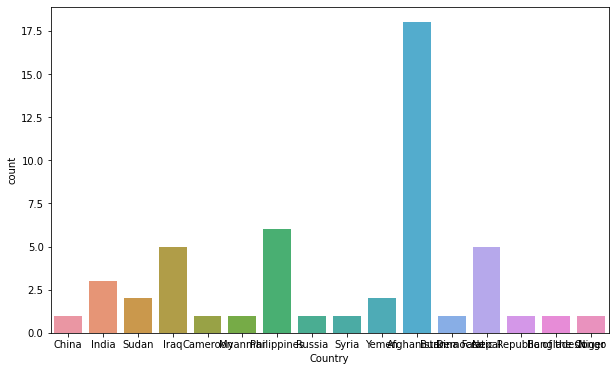

In [104]:
sns.countplot(df['Country'].head(50),label="Count")
plt.show()

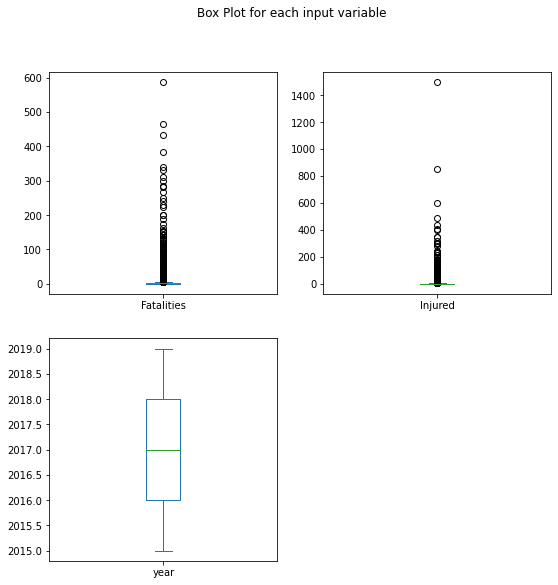

In [109]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each input variable')
plt.savefig('terror_box')
plt.show()

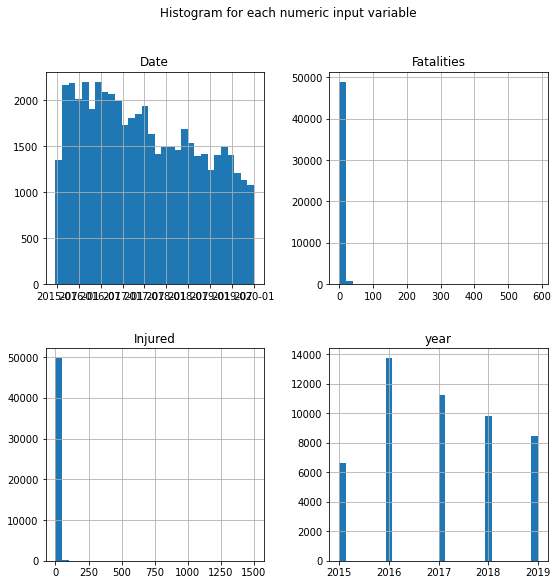

In [169]:
df.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('terror_hist')
plt.show()

In [180]:
df.dtypes

Date           datetime64[ns]
Country                object
City                   object
Perpetrator            object
Fatalities              int32
Injured                 int32
Target                 object
year                    int64
dtype: object

In [181]:
df['Country'] = df['Country'].astype('category')
df['City'] = df['City'].astype('category')
df['Perpetrator'] = df['Perpetrator'].astype('category')
df['Target'] = df['Target'].astype('category')
df.dtypes

Date           datetime64[ns]
Country              category
City                 category
Perpetrator          category
Fatalities              int32
Injured                 int32
Target               category
year                    int64
dtype: object

In [182]:
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

df.head(5)

,Date,Country,City,Perpetrator,Fatalities,Injured,Target,year
0,2019-12-31,25,6667,1391,0,0,87,2019
1,2019-12-31,52,1772,1391,0,1,282,2019
2,2019-12-31,116,5127,1391,2,0,117,2019
3,2019-12-31,116,5127,1391,2,1,227,2019
4,2019-12-31,55,1764,1391,0,0,282,2019


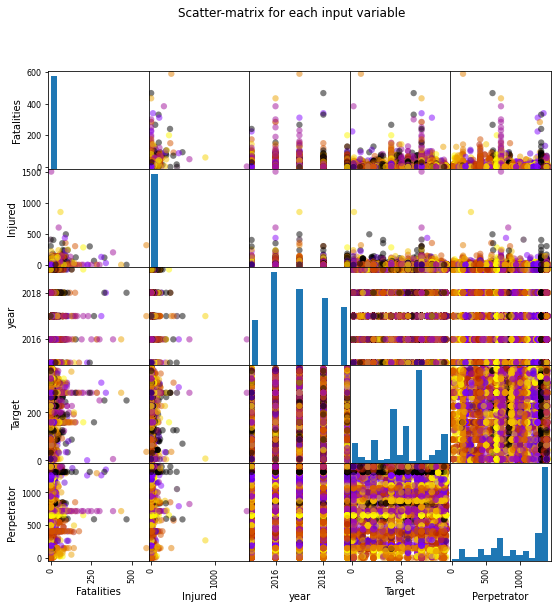

In [189]:
feature_names = ['Fatalities', 'Injured', 'year', 'Target', 'Perpetrator']
X = df[feature_names]
y = df['Country']

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

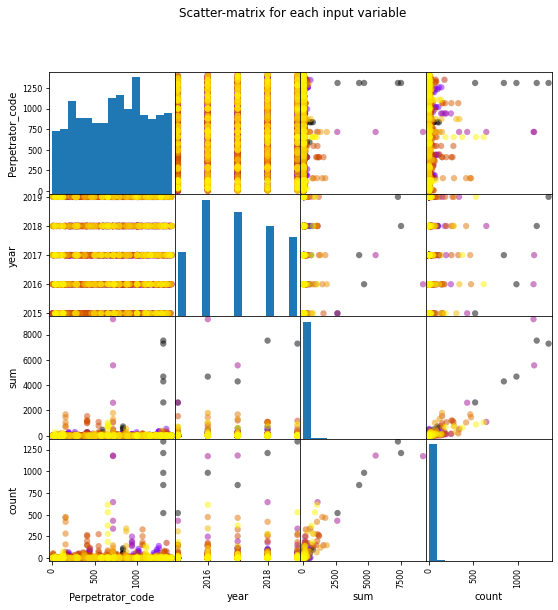

In [93]:
#df_by_country
feature_names = ['Perpetrator_code', 'year', 'sum', 'count']
X = df_by_country[feature_names]
y = df_by_country['country_code']

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.13
Accuracy of Logistic regression classifier on test set: 0.15


In [96]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.97
Accuracy of Decision Tree classifier on test set: 0.47


In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.46
Accuracy of K-NN classifier on test set: 0.23


In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.13
Accuracy of LDA classifier on test set: 0.15


In [99]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.06
Accuracy of GNB classifier on test set: 0.03


In [100]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.13
Accuracy of SVM classifier on test set: 0.15


In [101]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[11  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 13  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67        17
           2       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         2
          10       0.48      0.80      0.60        15
          11       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         0
          14       0.23      0.30      0.26        10
          15       0.00      0.00      0.00         1
          16       1.00      0.44      0.62         9
          17       0.00      0.00      0.00         3
          18       0.29      0.18      0.22        11
          19       0.00      0.00

C:\Users\ornir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ornir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ornir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [199]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_terror_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()


In [184]:
cor = df.corr(method='pearson')
cor.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\ornir\AppData\Local\Temp\ipykernel_16012\2327414679.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cor.style.background_gradient(cmap='coolwarm').set_precision(2)


,Country,City,Perpetrator,Fatalities,Injured,Target,year
Country,1.00,0.03,-0.31,-0.07,-0.04,-0.02,-0.06
City,0.03,1.00,-0.02,-0.00,-0.02,0.00,0.03
Perpetrator,-0.31,-0.02,1.00,-0.08,-0.03,0.03,-0.02
Fatalities,-0.07,-0.00,-0.08,1.00,0.33,-0.01,-0.00
Injured,-0.04,-0.02,-0.03,0.33,1.00,-0.02,-0.03
Target,-0.02,0.00,0.03,-0.01,-0.02,1.00,-0.03
year,-0.06,0.03,-0.02,-0.00,-0.03,-0.03,1.00
